**Renato Dias Ferreira Campos**<br/>


<h1>Trabalho de Aprendizado de Máquina - Agrupamento</h1>

### Importando bibliotecas

In [2]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## Dataset Iris

O **dataset Iris** é um dos conjuntos de dados mais conhecidos na área de aprendizado de máquina e estatística. Ele foi introduzido pelo estatístico Ronald Fisher em 1936 e é frequentemente usado para exemplificar algoritmos de classificação e clustering.

### Descrição Geral:
- O dataset contém **150 amostras** de flores de íris, divididas em **3 espécies**:
  1. **Iris Setosa**
  2. **Iris Versicolor**
  3. **Iris Virginica**
- Cada espécie tem **50 amostras**.
- Para cada amostra, são fornecidas **4 características** (features) medidas em centímetros.

---

## Colunas do Dataset

O dataset Iris possui as seguintes colunas:

| Nome da Coluna     | Descrição                                      | Tipo de Dado | Unidade |
|--------------------|------------------------------------------------|--------------|---------|
| **sepal.length**   | Comprimento da sépala (parte externa da flor). | Contínuo     | cm      |
| **sepal.width**    | Largura da sépala.                             | Contínuo     | cm      |
| **petal.length**   | Comprimento da pétala (parte interna da flor). | Contínuo     | cm      |
| **petal.width**    | Largura da pétala.                             | Contínuo     | cm      |
| **variety**        | Espécie da flor (rótulo/classe).               | Categórico   | -       |

---

## Detalhes sobre as Espécies (Classes)

As três espécies de íris no dataset são:

1. **Iris Setosa**:
   - Flores com sépalas e pétalas menores.
   - Facilmente distinguível das outras duas espécies.

2. **Iris Versicolor**:
   - Flores de tamanho médio.
   - Mais semelhante à Iris Virginica do que à Iris Setosa.

3. **Iris Virginica**:
   - Flores com sépalas e pétalas maiores.
   - Mais semelhante à Iris Versicolor.

---

In [3]:
df = pd.read_csv("iris.csv")

In [4]:
#Apresentação das 5 primeiras linhas
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#separação da nossa coluna classe (identifica a espécie da íris)
classe = ['variety']

In [7]:
#Transformando nossa classe categórica
df.replace({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}, inplace = True)

In [8]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
#DataFrame usado para o treinamento
df_noClass = df.drop('variety', axis = 1)

In [10]:
df_noClass.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
#normalizar os atributos contínuos com MinMaxScaler()
mms = MinMaxScaler()


mms.fit(df_noClass)
df_transformed = mms.transform(df_noClass)
df_transformed = pd.DataFrame(df_transformed)
df_transformed.head()

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [12]:
#Número de Classes
k = 3

In [13]:
#Treinamento 
km = KMeans(n_clusters=k)
km = km.fit_predict(df_noClass) 

In [14]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [15]:
#Transformando a classe em um array
classe_array = df['variety'].values

In [16]:
# Calcular o ARI (Adjusted Rand Index)
ari = adjusted_rand_score(classe_array, km)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

Adjusted Rand Index (ARI): 0.7302


In [17]:
# Calcular o AMI (Adjusted Mutual Information)
ami = adjusted_mutual_info_score(classe_array, km)
print(f"Adjusted Mutual Information (AMI): {ami:.4f}")

Adjusted Mutual Information (AMI): 0.7551


In [18]:
#Geração de uma lista com as somas dos quadrados das distâncias
Sum_of_squared_distances = []
for k in range(1, 15):
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

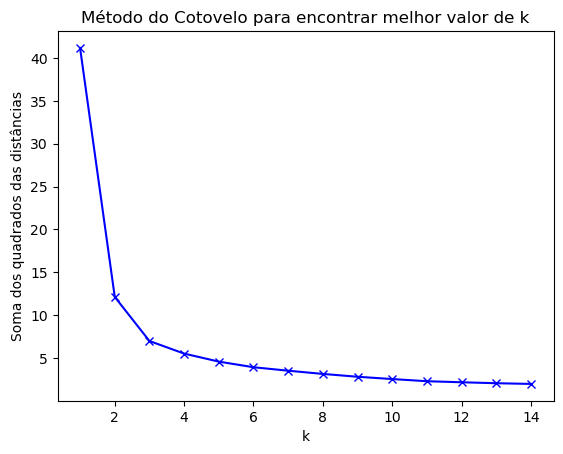

In [19]:
#Plotagem do SSE x K
plt.plot(range(1, 15), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do Cotovelo para encontrar melhor valor de k')
plt.show()

## Interpretação do Método do Cotovelo

O gráfico do **Método do Cotovelo** mostra a relação entre o número de clusters (\( k \)) e a **soma dos quadrados das distâncias (SSE)**. O objetivo é identificar o ponto onde a diminuição do SSE começa a se estabilizar, formando um "cotovelo". Neste caso, o cotovelo está localizado em **\( k = 3 \)**, o que indica que **3 clusters** é o número ideal de centróides. Após esse ponto, o SSE continua a diminuir, mas de forma menos significativa, sugerindo que adicionar mais clusters não traz ganhos relevantes na compactação dos dados. Portanto, **\( k = 3 \)** é a escolha mais adequada para o número de clusters.

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
#Geração de uma lista de todos os índices de silhueta de acordo com K
silhueta = []
for k in range(2,15):
    km = KMeans(n_clusters=k, n_init = 10)
    km = km.fit_predict(df_noClass)
    silhueta.append(silhouette_score(df_noClass, km))

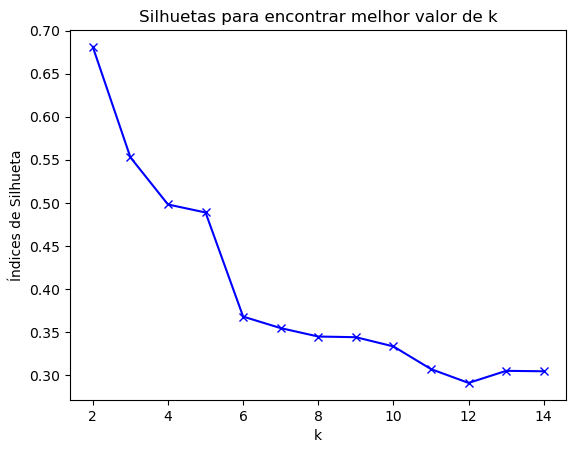

In [22]:
#plotagem Silhueta x K
plt.plot(range(2, 15), silhueta, 'bx-')
plt.xlabel('k')
plt.ylabel('Índices de Silhueta')
plt.title('Silhuetas para encontrar melhor valor de k')
plt.show()

## Interpretação do Índice de Silhueta

O gráfico do **Índice de Silhueta** mostra que tanto **\( k = 2 \)** quanto **\( k = 3 \)** têm valores altos, mas **\( k = 3 \)** é a escolha mais adequada. Embora o índice de silhueta para **\( k = 2 \)** seja alto, isso ocorre porque o algoritmo pode estar agrupando duas das três espécies naturais do dataset Iris em um único cluster, o que não reflete a verdadeira estrutura dos dados. O dataset Iris possui **3 espécies distintas** (Setosa, Versicolor e Virginica), e usar **\( k = 2 \)** pode resultar na fusão de duas espécies semelhantes (Versicolor e Virginica) em um único cluster, enquanto a Setosa é separada. Portanto, **\( k = 3 \)** é preferível, pois captura a estrutura natural dos dados, separando corretamente as três espécies. 